### Convert Raw SBE CTD Data For DITD 2018 to Netcdf Format 

I am going through this again because the data from DITx accessed on SEANOE is interpolated in weird way which removes a lot of the short term variability. I preprocessed the CTD data incorrectly the first time because I used the wrong reference pressure ( I used zero when it should have been ~1100 ), which resulted in much higher salinities 

In [78]:
# import packages 
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw

In [2]:
raw_data = pd.read_csv('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/SBE37SM-RS232_03715242_2019_01_03_RefPres1217.csv')

In [3]:
raw_data

,Temperature [ITS-90 deg C],Conductivity [S/m],Time [Elapsed seconds],Scan-Count,Pressure [Strain Gauge db],Flag,Absolute Salinity [TEOS-10 g/kg],Conservative Temperature [ ITS-90 deg C],"Potential Density [TEOS-10 sigma-theta, kg/m^3]",Potential Temperature [ITS-90 deg C],Practical Salinity [PSU]
0,18.881859,0.000088,0,0,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
1,18.913166,0.000088,180,1,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
2,18.930525,0.000088,360,2,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
3,18.961516,0.000088,540,3,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
4,19.000968,0.000088,720,4,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
...,...,...,...,...,...,...,...,...,...,...,...
143706,13.515468,0.000123,25867080,143706,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143707,13.621875,0.000128,25867260,143707,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143708,13.745601,0.000128,25867440,143708,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143709,13.825687,0.000128,25867620,143709,1217,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29


In [4]:
# we need to add time elapsed to start time to get actual date time 
# select time elapsed columns from raw_data 
dates = raw_data.iloc[:,2]

In [5]:
dates

0                0
1              180
2              360
3              540
4              720
            ...   
143706    25867080
143707    25867260
143708    25867440
143709    25867620
143710    25867800
Name: Time [Elapsed seconds], Length: 143711, dtype: int64

In [6]:
second_elapsed = dates.values 

In [7]:
# time stamp from cnv data file 
starttime = np.datetime64('2018-03-09 12:00:00')

In [8]:
seconds = np.timedelta64(second_elapsed[-1],'s')

In [9]:
endtime = starttime + seconds

In [10]:
dates = np.arange(starttime, endtime+np.timedelta64(180,'s'), np.timedelta64(180,'s'))

In [11]:
dates

array(['2018-03-09T12:00:00', '2018-03-09T12:03:00',
       '2018-03-09T12:06:00', ..., '2019-01-02T21:24:00',
       '2019-01-02T21:27:00', '2019-01-02T21:30:00'],
      shape=(143711,), dtype='datetime64[s]')

In [12]:
# extract data that I want from the raw_data dataframe 
data = raw_data.iloc[:,[0,1,4,6,7,8,9,10]]

In [13]:
data

,Temperature [ITS-90 deg C],Conductivity [S/m],Pressure [Strain Gauge db],Absolute Salinity [TEOS-10 g/kg],Conservative Temperature [ ITS-90 deg C],"Potential Density [TEOS-10 sigma-theta, kg/m^3]",Potential Temperature [ITS-90 deg C],Practical Salinity [PSU]
0,18.881859,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
1,18.913166,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
2,18.930525,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
3,18.961516,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
4,19.000968,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
...,...,...,...,...,...,...,...,...
143706,13.515468,0.000123,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143707,13.621875,0.000128,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143708,13.745601,0.000128,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143709,13.825687,0.000128,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29


In [14]:
# rename variables to something easier to work with
data = data.rename(
    columns={
        "Temperature [ITS-90 deg C]": "temp",
        "Conductivity [S/m]": "con",
        "Absolute Salinity [TEOS-10 g/kg]": "abs_sal",
        "Conservative Temperature [ ITS-90 deg C]": "cons_temp",
        "Potential Density [TEOS-10 sigma-theta, kg/m^3]": "sigma0",
        "Potential Temperature [ITS-90 deg C]": "theta",
        "Practical Salinity [PSU]": "sal",
        "Pressure [Strain Gauge db]": "pres"
    }
    )

In [15]:
data

,temp,con,pres,abs_sal,cons_temp,sigma0,theta,sal
0,18.881859,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
1,18.913166,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
2,18.930525,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
3,18.961516,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
4,19.000968,0.000088,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
...,...,...,...,...,...,...,...,...
143706,13.515468,0.000123,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143707,13.621875,0.000128,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143708,13.745601,0.000128,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
143709,13.825687,0.000128,1217,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29


In [16]:
# convert data to xarray dataset 
data = data.to_xarray()

In [17]:
# add time to dataset
data['time'] = ('index',dates)
# swap dimesnsions 
data = data.swap_dims({'index':'time'})
# remove index coordinate 
data = data.drop_vars('index')

(34.78, 34.88)

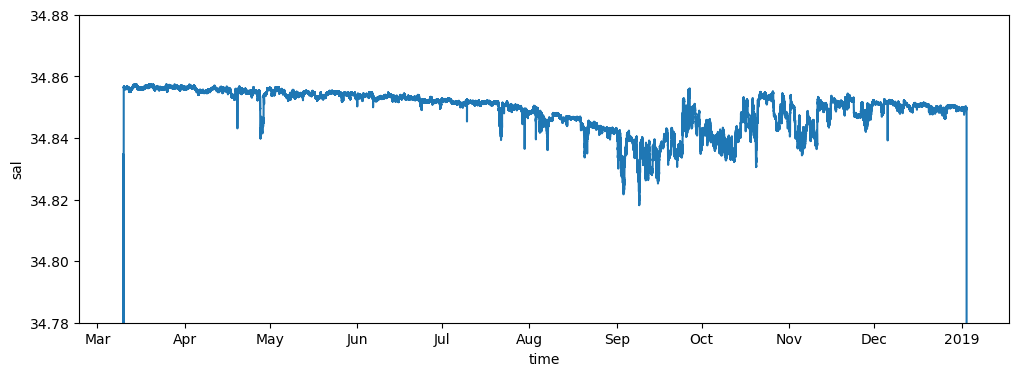

In [18]:
data.sal.plot(figsize=(12,4))
plt.ylim(34.78,34.88)

(-1.9, -1.87)

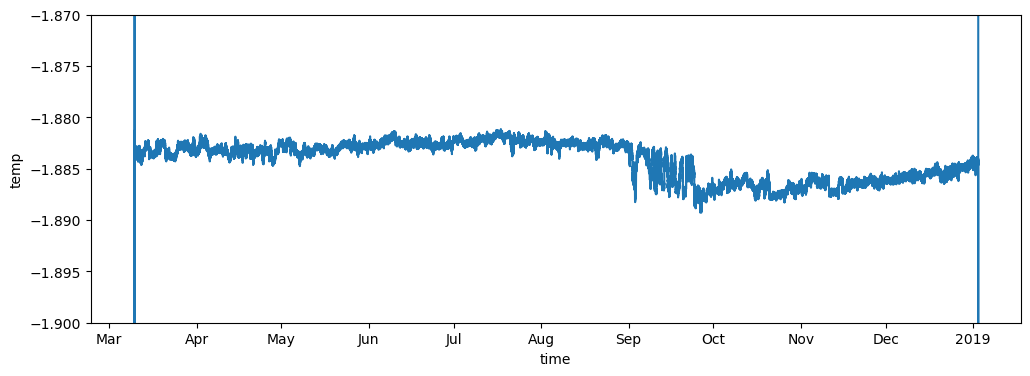

In [19]:
data.temp.plot(figsize=(12,4))
plt.ylim(-1.9,-1.87)

In [20]:
data

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 143711)
Coordinates:
  * time       (time) datetime64[s] 1MB 2018-03-09T12:00:00 ... 2019-01-02T21...
Data variables:
    temp       (time) float64 1MB 18.88 18.91 18.93 18.96 ... 13.75 13.83 14.01
    con        (time) float64 1MB 8.833e-05 8.835e-05 ... 0.0001284 0.0001257
    pres       (time) int64 1MB 1217 1217 1217 1217 1217 ... 1217 1217 1217 1217
    abs_sal    (time) float64 1MB -9.99e-29 -9.99e-29 ... -9.99e-29 -9.99e-29
    cons_temp  (time) float64 1MB -9.99e-29 -9.99e-29 ... -9.99e-29 -9.99e-29
    sigma0     (time) float64 1MB -9.99e-29 -9.99e-29 ... -9.99e-29 -9.99e-29
    theta      (time) float64 1MB -9.99e-29 -9.99e-29 ... -9.99e-29 -9.99e-29
    sal        (time) float64 1MB -9.99e-29 -9.99e-29 ... -9.99e-29 -9.99e-29

In [21]:
# function to identify the line number where *END* appears in .cnv file 
# the data starts after this line so we want to identify this so we know where to start from 
def find_data_start(fname):
    with open(fname) as f:
        for i, line in enumerate(f):
            if line.strip() == "*END*":
                return i + 1
    raise ValueError("*END* not found in file")


In [22]:
# provide file name
fname = "/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/SBE37SM-RS232_03715242_2019_01_03.cnv"
# get start line based on *END* location
start_line = find_data_start(fname)

In [23]:
start_line

291

In [24]:
# read in cnv data file, skipping appropriate number of lines, and use whitespace as delimiter
df = pd.read_csv(
    fname,
    skiprows=start_line,
    sep='\s+',
    header=None
)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mblan\AppData\Local\Temp\ipykernel_21380\2860529461.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


In [25]:
df

,0,1,2,3,4
0,0.000088,18.8819,-0.337,573912001,0.0
1,0.000088,18.9132,-0.338,573912181,0.0
2,0.000088,18.9305,-0.313,573912361,0.0
3,0.000088,18.9615,-0.345,573912541,0.0
4,0.000088,19.0010,-0.351,573912721,0.0
...,...,...,...,...,...
143706,0.000123,13.5155,-0.247,599779081,0.0
143707,0.000128,13.6219,-0.242,599779261,0.0
143708,0.000128,13.7456,-0.225,599779441,0.0
143709,0.000128,13.8257,-0.239,599779621,0.0


In [26]:
ditd_bot_pres = df.iloc[:,2].values

In [27]:
ditd_bot_pres

array([-0.337, -0.338, -0.313, ..., -0.225, -0.239, -0.234],
      shape=(143711,))

In [28]:
data['pres'] = ('time',ditd_bot_pres)

In [29]:
%matplotlib widget

(34.8, 34.9)

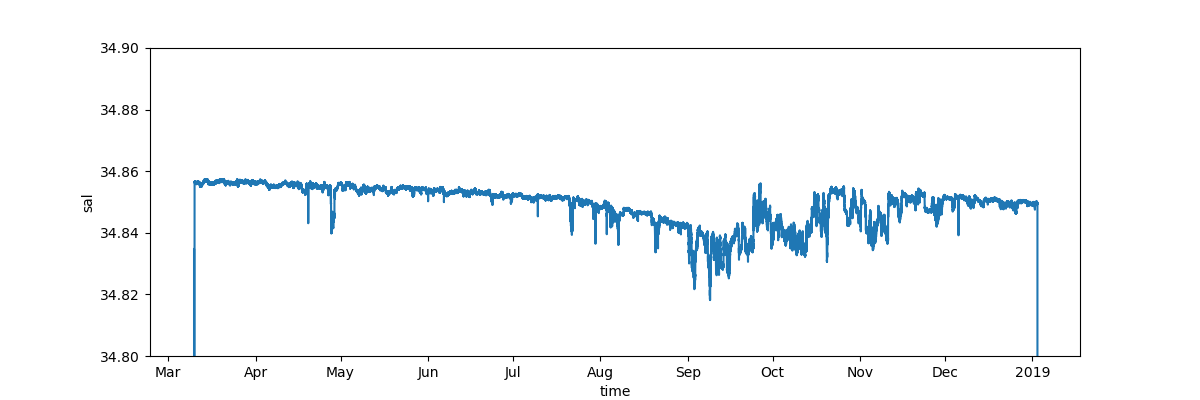

In [30]:
fig = plt.figure(figsize=(12,4))
data.sal.plot()
plt.ylim(34.8,34.9)

In [31]:
# times to cut off at - based on zooming in above 

ditd_bot = data.sel(time=slice('2018-03-10T07:00','2019-01-02T18:00'))

In [32]:
ditd_bot = ditd_bot.assign_coords({
    'lat': -75.28,
    'lon': 164.1,
    'z':1218
})

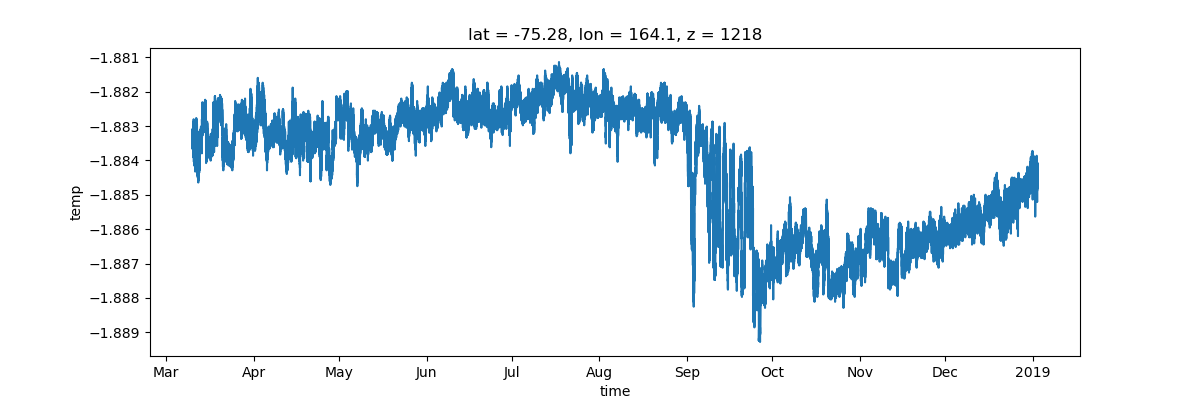

In [33]:
fig = plt.figure(figsize=(12,4))
ditd_bot.temp.plot()
# plt.ylim(34.8,34.9)

### DITD Top Sensor 

In [34]:
raw_data = pd.read_csv('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/SBE37SM-RS232_03715273_2019_01_03_RefPre1121.csv')

In [35]:
raw_data

,Temperature [ITS-90 deg C],Conductivity [S/m],Time [Elapsed seconds],Scan-Count,Pressure [Strain Gauge db],Flag,Absolute Salinity [TEOS-10 g/kg],Conservative Temperature [ ITS-90 deg C],"Potential Density [TEOS-10 sigma-theta, kg/m^3]",Potential Temperature [ITS-90 deg C],Practical Salinity [PSU]
0,18.567320,0.000104,0,0,1121,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
1,18.574045,0.000104,60,1,1121,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
2,18.583900,0.000104,120,2,1121,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
3,18.600208,0.000104,180,3,1121,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
4,18.605709,0.000104,240,4,1121,0,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
...,...,...,...,...,...,...,...,...,...,...,...
431674,13.991105,0.000192,25900440,431674,1121,0,2.304804e-04,1.462207e+01,9.992652e+02,1.387628e+01,2.293517e-04
431675,14.011660,0.000192,25900500,431675,1121,0,2.300330e-04,1.464345e+01,9.992624e+02,1.389664e+01,2.289064e-04
431676,14.068442,0.000192,25900560,431676,1121,0,2.287994e-04,1.470249e+01,9.992547e+02,1.395289e+01,2.276788e-04
431677,14.112650,0.000194,25900620,431677,1121,0,2.393193e-04,1.474845e+01,9.992486e+02,1.399669e+01,2.381472e-04


In [36]:
# we need to add time elapsed to start time to get actual date time 
# select time elapsed columns from raw_data 
dates = raw_data.iloc[:,2]

In [37]:
dates

0                0
1               60
2              120
3              180
4              240
            ...   
431674    25900440
431675    25900500
431676    25900560
431677    25900620
431678    25900680
Name: Time [Elapsed seconds], Length: 431679, dtype: int64

In [38]:
second_elapsed = dates.values 

In [39]:
# time stamp from cnv data file 
starttime = np.datetime64('2018-03-09 03:00:00')

In [40]:
seconds = np.timedelta64(second_elapsed[-1],'s')

In [41]:
endtime = starttime + seconds

In [42]:
dates = np.arange(starttime, endtime+np.timedelta64(60,'s'), np.timedelta64(60,'s'))

In [43]:
dates

array(['2018-03-09T03:00:00', '2018-03-09T03:01:00',
       '2018-03-09T03:02:00', ..., '2019-01-02T21:36:00',
       '2019-01-02T21:37:00', '2019-01-02T21:38:00'],
      shape=(431679,), dtype='datetime64[s]')

In [44]:
# extract data that I want from the raw_data dataframe 
data = raw_data.iloc[:,[0,1,4,6,7,8,9,10]]

In [45]:
data

,Temperature [ITS-90 deg C],Conductivity [S/m],Pressure [Strain Gauge db],Absolute Salinity [TEOS-10 g/kg],Conservative Temperature [ ITS-90 deg C],"Potential Density [TEOS-10 sigma-theta, kg/m^3]",Potential Temperature [ITS-90 deg C],Practical Salinity [PSU]
0,18.567320,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
1,18.574045,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
2,18.583900,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
3,18.600208,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
4,18.605709,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
...,...,...,...,...,...,...,...,...
431674,13.991105,0.000192,1121,2.304804e-04,1.462207e+01,9.992652e+02,1.387628e+01,2.293517e-04
431675,14.011660,0.000192,1121,2.300330e-04,1.464345e+01,9.992624e+02,1.389664e+01,2.289064e-04
431676,14.068442,0.000192,1121,2.287994e-04,1.470249e+01,9.992547e+02,1.395289e+01,2.276788e-04
431677,14.112650,0.000194,1121,2.393193e-04,1.474845e+01,9.992486e+02,1.399669e+01,2.381472e-04


In [46]:
# rename variables to something easier to work with
data = data.rename(
    columns={
        "Temperature [ITS-90 deg C]": "temp",
        "Conductivity [S/m]": "con",
        "Absolute Salinity [TEOS-10 g/kg]": "abs_sal",
        "Conservative Temperature [ ITS-90 deg C]": "cons_temp",
        "Potential Density [TEOS-10 sigma-theta, kg/m^3]": "sigma0",
        "Potential Temperature [ITS-90 deg C]": "theta",
        "Practical Salinity [PSU]": "sal",
        "Pressure [Strain Gauge db]": "pres"
    }
    )

In [47]:
data

,temp,con,pres,abs_sal,cons_temp,sigma0,theta,sal
0,18.567320,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
1,18.574045,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
2,18.583900,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
3,18.600208,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
4,18.605709,0.000104,1121,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29,-9.990000e-29
...,...,...,...,...,...,...,...,...
431674,13.991105,0.000192,1121,2.304804e-04,1.462207e+01,9.992652e+02,1.387628e+01,2.293517e-04
431675,14.011660,0.000192,1121,2.300330e-04,1.464345e+01,9.992624e+02,1.389664e+01,2.289064e-04
431676,14.068442,0.000192,1121,2.287994e-04,1.470249e+01,9.992547e+02,1.395289e+01,2.276788e-04
431677,14.112650,0.000194,1121,2.393193e-04,1.474845e+01,9.992486e+02,1.399669e+01,2.381472e-04


In [48]:
# convert data to xarray dataset 
data = data.to_xarray()

In [49]:
# add time to dataset
data['time'] = ('index',dates)
# swap dimesnsions 
data = data.swap_dims({'index':'time'})
# remove index coordinate 
data = data.drop_vars('index')

(34.78, 34.88)

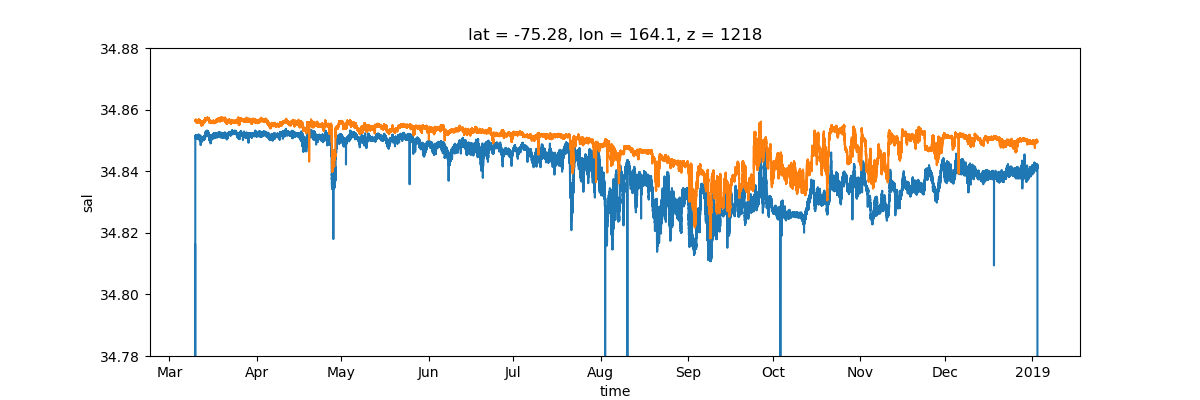

In [50]:
plt.plot(figsize=(12,4))
data.sal.plot(figsize=(12,4))
ditd_bot.sal.plot()
plt.ylim(34.78,34.88)

(-1.9, -1.87)

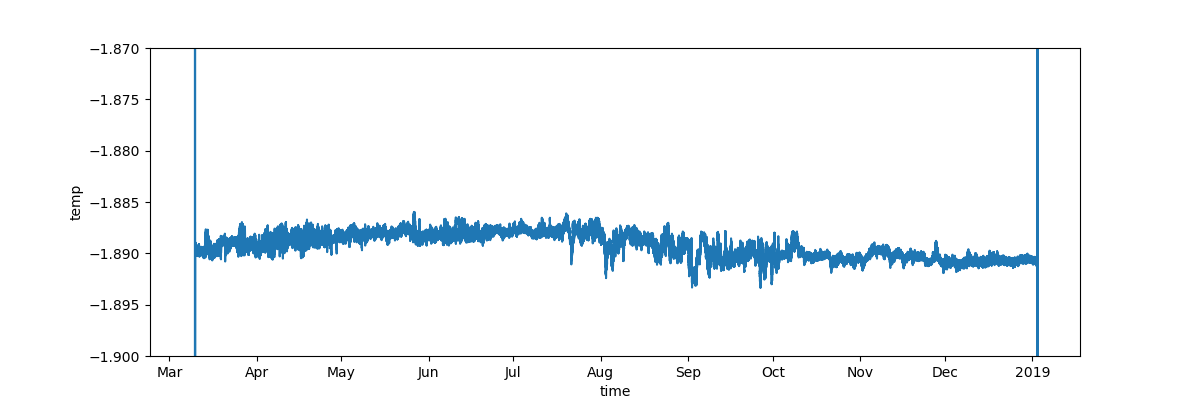

In [51]:
data.temp.plot(figsize=(12,4))
plt.ylim(-1.9,-1.87)

In [52]:
data

<xarray.Dataset> Size: 31MB
Dimensions:    (time: 431679)
Coordinates:
  * time       (time) datetime64[s] 3MB 2018-03-09T03:00:00 ... 2019-01-02T21...
Data variables:
    temp       (time) float64 3MB 18.57 18.57 18.58 18.6 ... 14.07 14.11 14.16
    con        (time) float64 3MB 0.0001043 0.0001043 ... 0.0001943 0.0001943
    pres       (time) int64 3MB 1121 1121 1121 1121 1121 ... 1121 1121 1121 1121
    abs_sal    (time) float64 3MB -9.99e-29 -9.99e-29 ... 0.0002393 0.0002384
    cons_temp  (time) float64 3MB -9.99e-29 -9.99e-29 -9.99e-29 ... 14.75 14.79
    sigma0     (time) float64 3MB -9.99e-29 -9.99e-29 -9.99e-29 ... 999.2 999.2
    theta      (time) float64 3MB -9.99e-29 -9.99e-29 -9.99e-29 ... 14.0 14.04
    sal        (time) float64 3MB -9.99e-29 -9.99e-29 ... 0.0002381 0.0002372

In [53]:
# function to identify the line number where *END* appears in .cnv file 
# the data starts after this line so we want to identify this so we know where to start from 
def find_data_start(fname):
    with open(fname) as f:
        for i, line in enumerate(f):
            if line.strip() == "*END*":
                return i + 1
    raise ValueError("*END* not found in file")


In [54]:
# provide file name
fname = "/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/s1803DITD1_15273.cnv"
# get start line based on *END* location
start_line = find_data_start(fname)

In [55]:
start_line

295

In [56]:
# read in cnv data file, skipping appropriate number of lines, and use whitespace as delimiter
df = pd.read_csv(
    fname,
    skiprows=start_line,
    sep='\s+',
    header=None
)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mblan\AppData\Local\Temp\ipykernel_21380\2860529461.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


In [57]:
df

,0,1,2,3,4
0,0.000104,18.5673,0.040,573922801,0.0
1,0.000104,18.5740,0.034,573922861,0.0
2,0.000104,18.5839,0.034,573922921,0.0
3,0.000104,18.6002,0.027,573922981,0.0
4,0.000104,18.6057,0.020,573923041,0.0
...,...,...,...,...,...
431674,0.000192,13.9911,0.012,599823241,0.0
431675,0.000192,14.0117,0.006,599823301,0.0
431676,0.000192,14.0684,0.006,599823361,0.0
431677,0.000194,14.1127,0.011,599823421,0.0


In [58]:
ditd_top_pres = df.iloc[:,2].values

In [59]:
data['pres'] = ('time',ditd_top_pres)

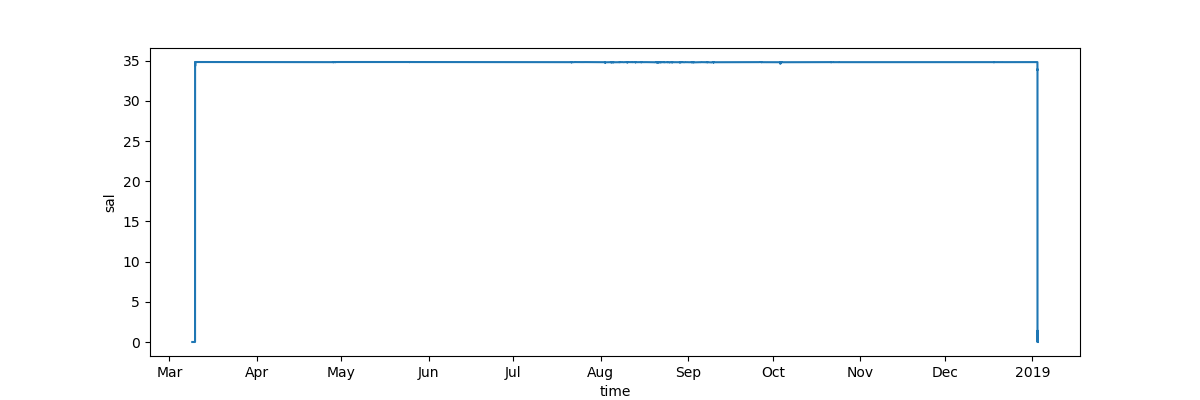

In [60]:
fig = plt.figure(figsize=(12,4))
data.sal.plot()


In [61]:
# times to cut off at - based on zooming in above 

ditd_top = data.sel(time=slice('2018-03-10T05:00','2019-01-02T19:00'))

In [62]:
ditd_top = ditd_top.assign_coords({
    'lat': -75.28,
    'lon': 164.1,
    'z':1121
})

(34.78, 34.88)

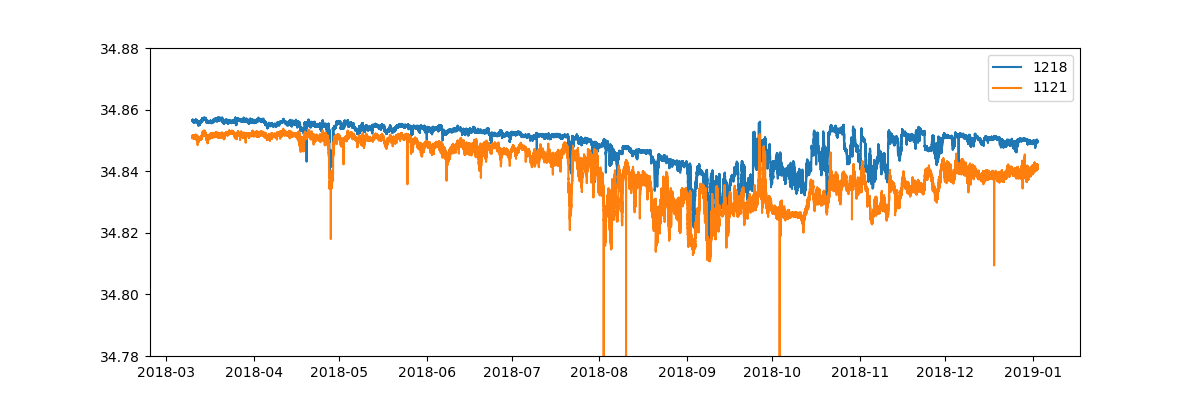

In [63]:
fig = plt.figure(figsize=(12,4))
plt.plot(ditd_bot.time,ditd_bot.sal,label='1218')
plt.plot(ditd_top.time,ditd_top.sal,label='1121')
plt.legend()
plt.ylim(34.78,34.88)

### Remove Outliers 

#### DITD top CTD sensor 

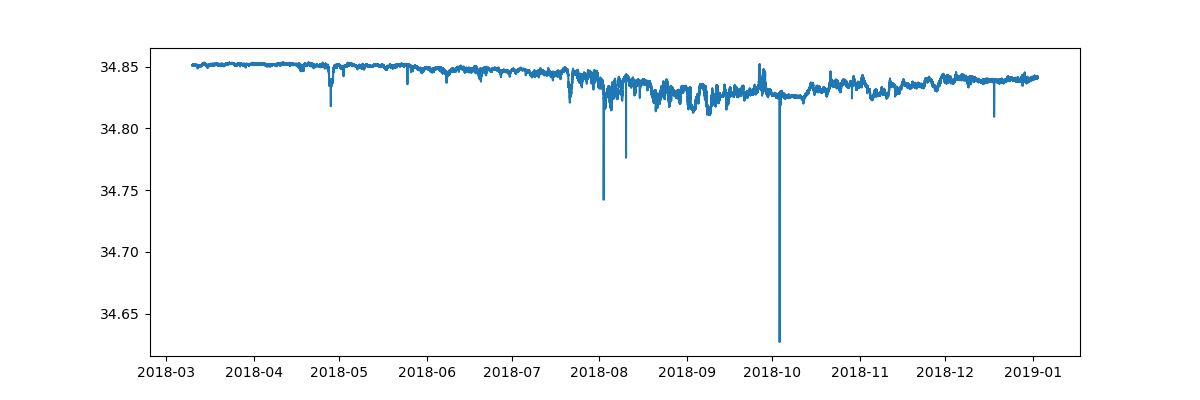

In [64]:
fig = plt.figure(figsize=(12,4))
plt.plot(ditd_top.time,ditd_top.sal)

In [65]:
times = [
    np.datetime64('2018-04-28T03:21'),
    np.datetime64('2018-05-25T04:40'),
    np.datetime64('2018-06-08T00:16'),
    np.datetime64('2018-08-02T12:15'),
    np.datetime64('2018-08-10T09:34'),
    np.datetime64('2018-10-03T15:27'),
    np.datetime64('2018-12-18T09:19'),
]

In [66]:
times

[np.datetime64('2018-04-28T03:21'),
 np.datetime64('2018-05-25T04:40'),
 np.datetime64('2018-06-08T00:16'),
 np.datetime64('2018-08-02T12:15'),
 np.datetime64('2018-08-10T09:34'),
 np.datetime64('2018-10-03T15:27'),
 np.datetime64('2018-12-18T09:19')]

In [67]:
for i in range(len(times)):
    ditd_top['sal'].loc[dict(time=times[i])] = np.nan

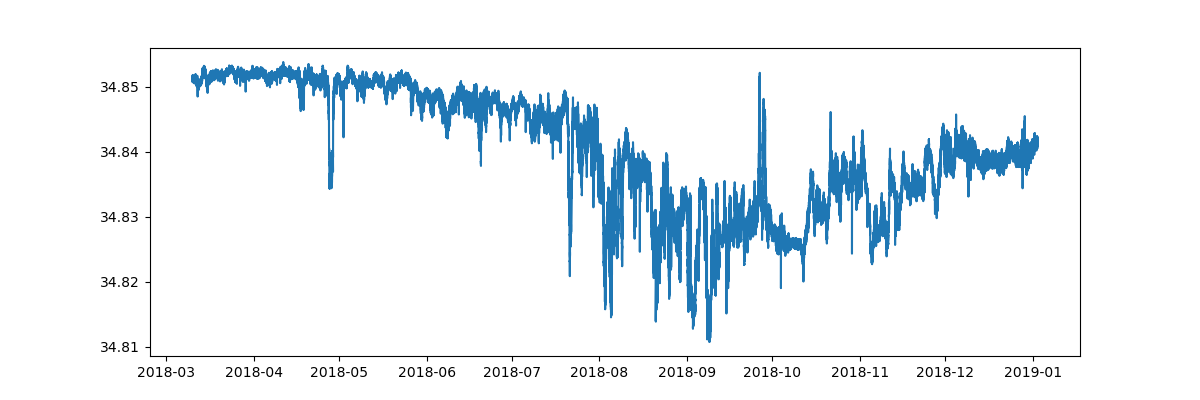

In [68]:
fig = plt.figure(figsize=(12,4))
plt.plot(ditd_top.time,ditd_top.sal)

In [69]:
# to remove
# 2018-04-28T03:21
# 2018-05-25T04:40
# 2018-06-08T00:16
# 2018-08-02T12:15
# 2018-08-10T09:34
# 2018-10-03T15:27
# 2018-12-18T09:19



#### DITD bot CTD sensor 

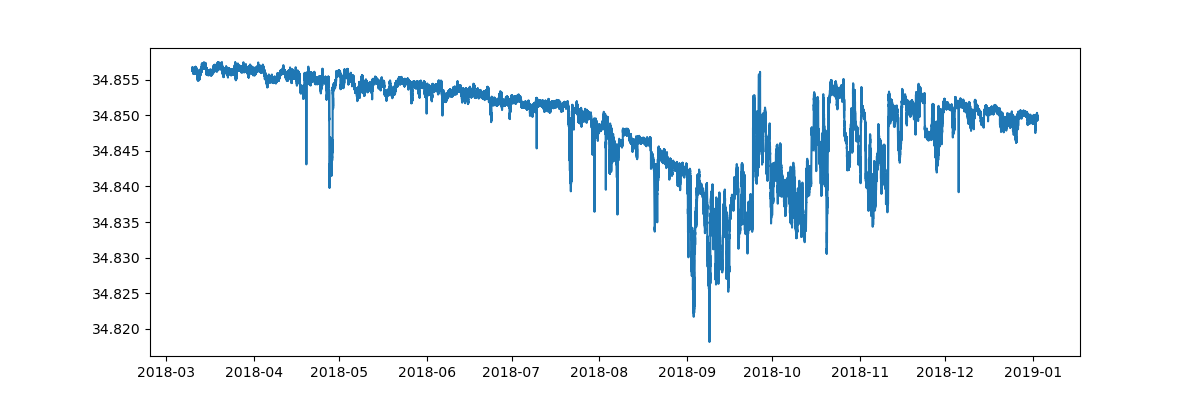

In [70]:
fig = plt.figure(figsize=(12,4))
plt.plot(ditd_bot.time,ditd_bot.sal)

In [71]:
# 2018-04-19T13:48
# 2018-07-09T21:00
# 2018-07-30T06:51
# 2018-12-05T20:18



In [72]:
times = [
    np.datetime64('2018-04-19T13:48'),
    np.datetime64('2018-07-09T21:00'),
    np.datetime64('2018-07-30T06:51'),
    np.datetime64('2018-12-05T20:18'),
]

In [73]:
times

[np.datetime64('2018-04-19T13:48'),
 np.datetime64('2018-07-09T21:00'),
 np.datetime64('2018-07-30T06:51'),
 np.datetime64('2018-12-05T20:18')]

In [74]:
for i in range(len(times)):
    ditd_bot['sal'].loc[dict(time=times[i])] = np.nan

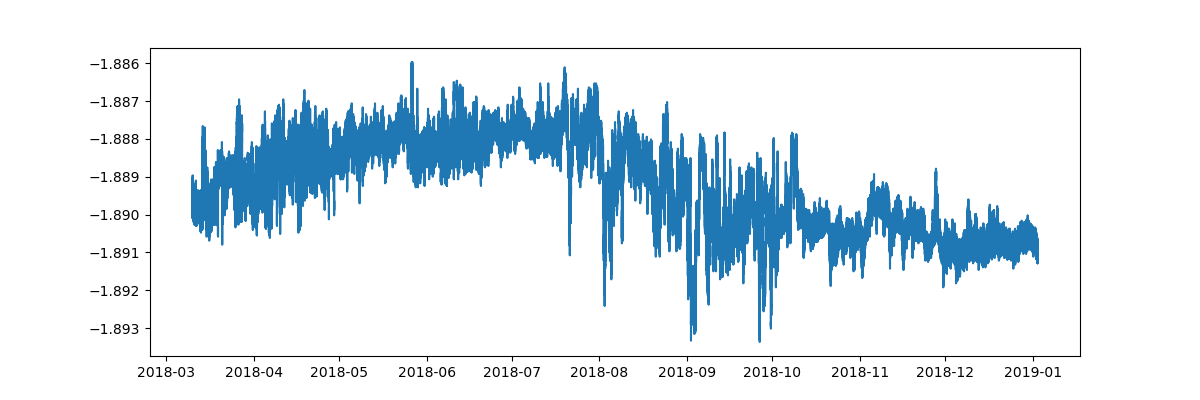

In [75]:
fig = plt.figure(figsize=(12,4))
plt.plot(ditd_top.time,ditd_top.temp)

In [79]:
# outliers have been removed, now we can save data 
ditd_top.to_netcdf('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/DITD_2018_ctd_top.nc')
ditd_bot.to_netcdf('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/DITD_2018_ctd_bot.nc')